# ISYS 812  Project Coding Session - Team 2

## Part 1 Data Cleaning Procedures 

### Step1. Import several library

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt

### Step2. Reading Data and Saving to New Dataframe 'df'

In [2]:
df = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')
df

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",16106100004134
150496,176000742,NON-CRIMINAL,LOST PROPERTY,Friday,12/30/2016 12:00:00 AM,08:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,-122.401857,37.796626,"(37.7966261239618, -122.401857374739)",17600074271000
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",17600075806372
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)",17600076406374


### Step3. Modifying Missing Values

In [3]:
# First, find and count the missing data
num_missing=df.shape[0] - df.count()
num_missing

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

In [4]:
# Second, use the last or next non-missing value by setting the parameter method to "ffill".
df = df.fillna(method='ffill')
df.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

### Step4.  Adding New Columns

#### a. Adding one column ‘date_time’
Combine the date element from the 'Date' column with the time element from 'Time' column together;                                   
Next, convert from string to datetime, and save to the new column 'date_time'

In [5]:
## first, create new column 'date' by using split() and get() to grab the date element 
df['date'] = df['Date'].str.split().str.get(0)
df['date']

0         01/29/2016
1         01/29/2016
2         04/25/2016
3         01/05/2016
4         01/01/2016
             ...    
150495    12/30/2016
150496    12/30/2016
150497    12/29/2016
150498    12/30/2016
150499    12/02/2016
Name: date, Length: 150500, dtype: object

In [6]:
## second, create new column 'date_time' to convert the combination of 'date' and 'Time' from string into datetime
df['date_time'] = pd.to_datetime(df['date'] + ' '+ df['Time'], format= '%m/%d/%Y %H:%M')
df['date_time']

0        2016-01-29 11:00:00
1        2016-01-29 11:00:00
2        2016-04-25 14:59:00
3        2016-01-05 23:50:00
4        2016-01-01 00:30:00
                 ...        
150495   2016-12-30 21:01:00
150496   2016-12-30 08:00:00
150497   2016-12-29 20:00:00
150498   2016-12-30 10:00:00
150499   2016-12-02 14:00:00
Name: date_time, Length: 150500, dtype: datetime64[ns]

In [7]:
## third, locate the new column after the column DayOfWeek
df.insert(6, 'date_time', df.pop('date_time'))

#### b. Adding  two columns ‘Month’ and ‘Hour’
After adding the column ‘date_time’, we need to to exact the ‘month’ and ‘hour’ two elements from this datetime series, and save to two new columns, separately named  ‘Month’ and ‘Hour’.         
Then, locate  two new columns after the column ‘date_time’


In [8]:
# Adding 'Month' column to extract the month element from the 'date_time' series
df['Month'] = [MONTHs.month for MONTHs in df['date_time']]

# Adding 'Hour' column to extract the hour element from the 'date_time' series
df['Hour'] = [HOURs.hour for HOURs in df['date_time']]

# locate two new columns after the column ‘date_time’
df.insert(5, 'Month', df.pop('Month'))
df.insert(6, 'Hour', df.pop('Hour'))


### Step5. Removing Unnecessary Columns

In [9]:
df.drop(['X','Y','Date','Time','date'], axis = 1, inplace = True)

### Step6. Display Final Dataset

In [10]:
# show several information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   IncidntNum  150500 non-null  int64         
 1   Category    150500 non-null  object        
 2   Descript    150500 non-null  object        
 3   DayOfWeek   150500 non-null  object        
 4   Month       150500 non-null  int64         
 5   Hour        150500 non-null  int64         
 6   date_time   150500 non-null  datetime64[ns]
 7   PdDistrict  150500 non-null  object        
 8   Resolution  150500 non-null  object        
 9   Address     150500 non-null  object        
 10  Location    150500 non-null  object        
 11  PdId        150500 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 13.8+ MB


In [11]:
# display the dataset 'df'
df

,IncidntNum,Category,Descript,DayOfWeek,Month,Hour,date_time,PdDistrict,Resolution,Address,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,1,11,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,1,11,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,4,14,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,1,23,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,1,0,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,"(37.7650501214668, -122.419671780296)",16000274071000
...,...,...,...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,Friday,12,21,2016-12-30 21:01:00,PARK,NONE,OAK ST / STANYAN ST,"(37.7714278595913, -122.453981622365)",16106100004134
150496,176000742,NON-CRIMINAL,LOST PROPERTY,Friday,12,8,2016-12-30 08:00:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,"(37.7966261239618, -122.401857374739)",17600074271000
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12,20,2016-12-29 20:00:00,CENTRAL,NONE,PINE ST / TAYLOR ST,"(37.7906727649886, -122.41226909106)",17600075806372
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12,10,2016-12-30 10:00:00,CENTRAL,NONE,200 Block of STOCKTON ST,"(37.7882745285785, -122.406658711008)",17600076406374


## Part 2   Data Analysis

### Sub-question 1
(A). Which district had the highest incident rate? 
(B). For this distinct,which category had the highest incident rate?

####  a.   Which district had the highest incident rate? 

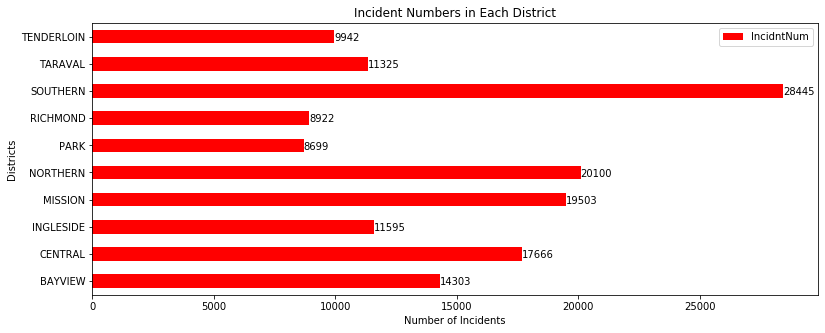

In [13]:
#Grouping the Districts together and counting the number of incidents
Districts = df.groupby('PdDistrict').IncidntNum.count()

#Creating a figure with
barh = plt.figure(figsize = (13,5))
axes2 = barh.add_subplot(1,1,1)

#Plotting the Districts and the number of Cases in Each District
axes2 = Districts.plot.barh(color = 'red', legend = True)
axes2.set(xlabel = 'Number of Incidents',
         ylabel = 'Districts',
         title = "Incident Numbers in Each District")

#Labeling the data to the right of each row
for i, v in enumerate(Districts):
    axes2.text(v, i-.15, str(v))


#### b.  For this distict, which category had the highest incident rate? 

posx and posy should be finite values
posx and posy should be finite values


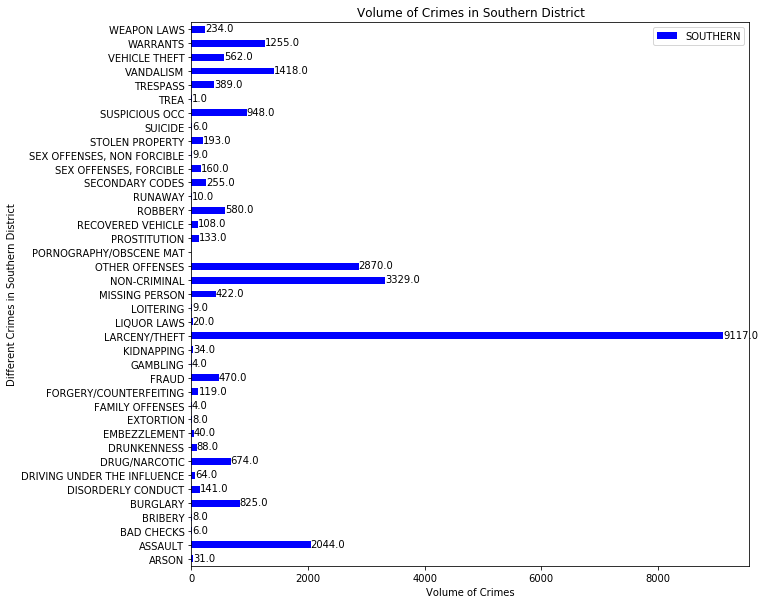

In [18]:
#Creating a Pivot Table to observe the different types of crimes in different districts
CrimeInDistricts = df.pivot_table(
    index = ['Category'],
    columns = 'PdDistrict',
    values = 'IncidntNum',
    aggfunc=pd.Series.nunique)

#Grouping the crimes in Southern District
CrimeInSouthern = CrimeInDistricts['SOUTHERN']

#Configuring the size of figure
CrimeVolume = plt.figure(figsize = (10,10))

#Creating Plot
CrimeVolume = CrimeInSouthern.plot.barh(color = 'blue', legend = True)

#Labeling Table
CrimeVolume.set(xlabel = 'Volume of Crimes',
         ylabel = 'Different Crimes in Southern District',
         title = "Volume of Crimes in Southern District")

#Labeling each row in plot
for i, v in enumerate(CrimeInSouthern):
    CrimeVolume.text(v, i-.15,str(v))

### Sub-question 2

#### Which category of incident was the largest contributor to crimes in San Francisco?

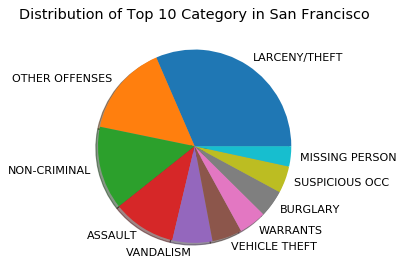

In [19]:
# Getting categories who have the top 10 number of of crime incidents, and save to the new variable ‘category_top10’
category_top10 = df.groupby('Category').Category.count().sort_values(ascending = False).head(10)

# Using the Pie Chart to study the distribution of top10 crime categories in San Francisco
piechart, ax1 = plt.subplots(figsize=(9,4), facecolor='white', dpi= 80)
ax1.pie(x = category_top10.values, labels = category_top10.index, shadow = True)

# Adding Title and Labels
ax1.set_title('Distribution of Top 10 Category in San Francisco', fontsize = 13)

plt.show()

### Sub-quesiton 3

#### a.  What days of week have the highest crime rates?

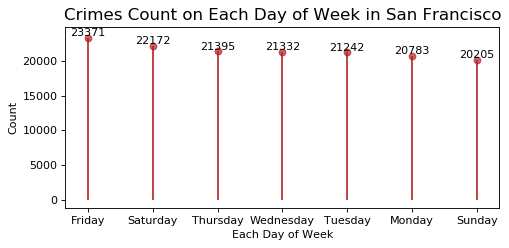

In [20]:
# Creating a new series ‘week_ranking’ containing  counts of crime accidents happening on each day of week. The resulting object will be in descending order.
week_ranking = df.DayOfWeek.value_counts()

# Drawing Lollipop Chart 
count, ax2 = plt.subplots(figsize=(7,3), facecolor='white', dpi= 80)
ax2.vlines(x=week_ranking.index, ymin=0, ymax=week_ranking.values, color='firebrick')
ax2.scatter(x=week_ranking.index, y=week_ranking.values, color='firebrick', alpha=0.7)

# Adding Title and Labels
ax2.set_title("Crimes Count on Each Day of Week in San Francisco", fontsize = 15)
ax2.set_xlabel("Each Day of Week")
ax2.set_ylabel("Count")

# Adding a text label above each point
for name,num in zip(week_ranking.index, week_ranking.values):
    ax2.text(x = name, y = num, s = num, ha = 'center', va = 'bottom' )

plt.show()


#### b.  Which month of the year has the highest crime rate?

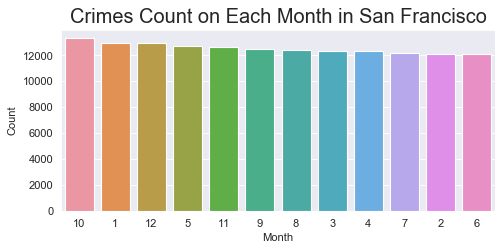

In [21]:
# Creating a new series ‘month_ranking’ which contains counts of crimes incidents that happened during each month in 2016. The result will be in descending order.
month_ranking = df.Month.value_counts()

# Drawing Count Plot
sns.set_style('darkgrid')
count, ax3 = plt.subplots(figsize=(7,3), facecolor='white', dpi= 80)
ax3 = sns.countplot(x = 'Month', data = df, order = month_ranking.index)

# Adding Title and Labels
ax3.set_title("Crimes Count on Each Month in San Francisco", fontsize = 18)
ax3.set_xlabel("Month")
ax3.set_ylabel("Count")

plt.show()


#### c.   Which time period of the day has the highest time rates?

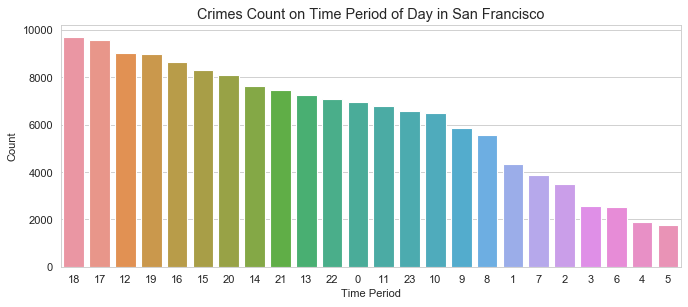

In [22]:
# Creating a new series ‘hour_ranking’ which contains counts of crimes incidents happened during each period of the day. The result will be in descending order.
hour_ranking = df.Hour.value_counts()

# Drawing Count Plot
sns.set_style('whitegrid')
count, ax4 = plt.subplots(figsize=(10,4), facecolor='white', dpi= 80)
ax4 = sns.countplot(x = 'Hour', data = df, order = hour_ranking.index)

# Adding Title and Labels
ax4.set_title("Crimes Count on Time Period of Day in San Francisco", fontsize = 13)
ax4.set_xlabel("Time Period")
ax4.set_ylabel("Count")

plt.show()


### Sub-question 4

#### a.  What is the percentage of incident cases that did not have any resolution? 

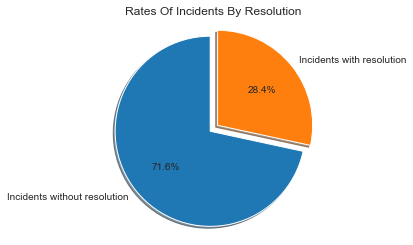

In [28]:
# Displaying the percentage of incident cases that did not have any resolution
df_without_resolution=df[df['Resolution']=='NONE']
incident_without_resolution = df_without_resolution.shape[0]/df.shape[0]
incident_with_resolution=1-incident_without_resolution

# Drawing pie chart
fig1, ax1 = plt.subplots()
ax1.pie([incident_without_resolution,incident_with_resolution], explode=[0, 0.1], labels=['Incidents without resolution', 'Incidents with resolution'], autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title('Rates Of Incidents By Resolution')

plt.show()


#### b. What are the categories of crime that didn’t have a resolution?

In [29]:
# Showing number of categories of crime that didn’t have a resolution
print("There are {} number of categories that didn't have a resolution".format(len(df_without_resolution['Category'].unique())))

# Displaying the categories of crime that didn’t have a resolution
print(df_without_resolution['Category'].unique())

There are 39 number of categories that didn't have a resolution
['NON-CRIMINAL' 'ASSAULT' 'MISSING PERSON' 'LARCENY/THEFT' 'BURGLARY'
 'ROBBERY' 'FRAUD' 'OTHER OFFENSES' 'VEHICLE THEFT' 'VANDALISM' 'ARSON'
 'SECONDARY CODES' 'SUSPICIOUS OCC' 'TRESPASS' 'DRUNKENNESS' 'RUNAWAY'
 'WARRANTS' 'DISORDERLY CONDUCT' 'SEX OFFENSES, FORCIBLE'
 'RECOVERED VEHICLE' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'PROSTITUTION' 'WEAPON LAWS' 'EMBEZZLEMENT' 'BRIBERY'
 'DRIVING UNDER THE INFLUENCE' 'KIDNAPPING' 'SUICIDE' 'STOLEN PROPERTY'
 'LIQUOR LAWS' 'EXTORTION' 'FAMILY OFFENSES' 'LOITERING' 'TREA'
 'SEX OFFENSES, NON FORCIBLE' 'BAD CHECKS' 'GAMBLING'
 'PORNOGRAPHY/OBSCENE MAT']


### Sub-question 5

#### a.   What category of crime that has the most unresolved issues? 

LARCENY/THEFT                  38574
NON-CRIMINAL                   15843
ASSAULT                         7936
VANDALISM                       7569
OTHER OFFENSES                  6969
VEHICLE THEFT                   5847
SUSPICIOUS OCC                  5207
BURGLARY                        4754
MISSING PERSON                  3870
ROBBERY                         2581
FRAUD                           2189
SECONDARY CODES                 1203
TRESPASS                         776
RECOVERED VEHICLE                679
SEX OFFENSES, FORCIBLE           674
WEAPON LAWS                      432
FORGERY/COUNTERFEITING           403
DRUG/NARCOTIC                    380
DISORDERLY CONDUCT               358
WARRANTS                         354
ARSON                            206
KIDNAPPING                       158
EMBEZZLEMENT                     131
RUNAWAY                          130
DRUNKENNESS                      111
STOLEN PROPERTY                   72
PROSTITUTION                      70
S

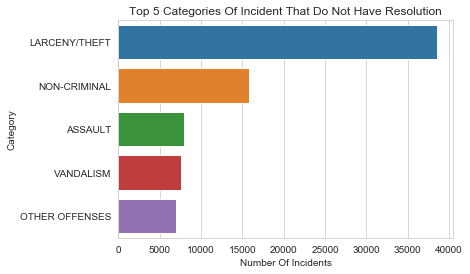

In [30]:
# Displaying all categories of crime and sorting them from the most unresolved issues
print(df_without_resolution.Category.value_counts())

# Displaying top 5 to better display the bar plot
top5_category_without_resolution = df_without_resolution.Category.value_counts().head(5)
top5_category_without_resolution

# Concatenating top 5 into 1 data frame
df1_category=df_without_resolution[df_without_resolution['Category']==top5_category_without_resolution.index[0]]
df2_category=df_without_resolution[df_without_resolution['Category']==top5_category_without_resolution.index[1]]
df3_category=df_without_resolution[df_without_resolution['Category']==top5_category_without_resolution.index[2]]
df4_category=df_without_resolution[df_without_resolution['Category']==top5_category_without_resolution.index[3]]
df5_category=df_without_resolution[df_without_resolution['Category']==top5_category_without_resolution.index[4]]

df_top5_category_without_resolution= pd.concat([df1_category,df2_category,df3_category,df4_category,df5_category])

# Drawing bar plot
hst, ax = plt.subplots()
ax = sns.countplot(y = 'Category' , data = df_top5_category_without_resolution)
ax.set_title('Top 5 Categories Of Incident That Do Not Have Resolution')
ax.set_xlabel('Number Of Incidents')
plt.show()


#### b.   For that category of crime, what is the incident that happened the most?

GRAND THEFT FROM LOCKED AUTO                               17684
PETTY THEFT OF PROPERTY                                     4362
PETTY THEFT FROM LOCKED AUTO                                3914
GRAND THEFT OF PROPERTY                                     2182
GRAND THEFT FROM UNLOCKED AUTO                              1905
PETTY THEFT FROM A BUILDING                                 1727
GRAND THEFT FROM PERSON                                     1351
GRAND THEFT FROM A BUILDING                                 1055
GRAND THEFT PICKPOCKET                                       826
PETTY THEFT SHOPLIFTING                                      777
PETTY THEFT FROM UNLOCKED AUTO                               543
PETTY THEFT BICYCLE                                          437
GRAND THEFT BICYCLE                                          376
LOST PROPERTY, PETTY THEFT                                   227
ATTEMPTED THEFT FROM LOCKED VEHICLE                          211
GRAND THEFT SHOPLIFTING  

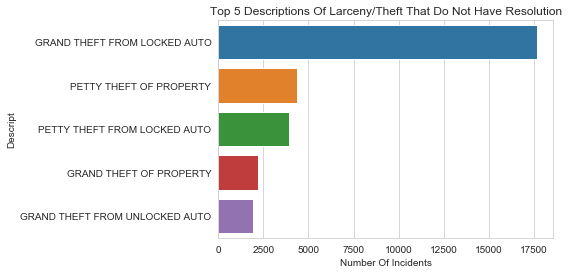

In [31]:
# Displaying all incidents within the former category of crime and sorting them from the most unresolved issues
print(df1_category.Descript.value_counts())

# Displaying the number of descriptions within the former category of crime
len(df1_category.Descript.value_counts())

# Displaying top 5 to better display the bar plot
top5_larceny_without_resolution = df1_category.Descript.value_counts().head(5)
top5_larceny_without_resolution

# Concatenating top 5 into 1 data frame
df1_larceny=df1_category[df1_category['Descript']==top5_larceny_without_resolution.index[0]]
df2_larceny=df1_category[df1_category['Descript']==top5_larceny_without_resolution.index[1]]
df3_larceny=df1_category[df1_category['Descript']==top5_larceny_without_resolution.index[2]]
df4_larceny=df1_category[df1_category['Descript']==top5_larceny_without_resolution.index[3]]
df5_larceny=df1_category[df1_category['Descript']==top5_larceny_without_resolution.index[4]]

df_top5_larceny_without_resolution= pd.concat([df1_larceny,df2_larceny,df3_larceny,df4_larceny,df5_larceny])

# Drawing bar plot
hst, ax = plt.subplots()
ax = sns.countplot(y = 'Descript' , data = df_top5_larceny_without_resolution)
ax.set_title('Top 5 Descriptions Of Larceny/Theft That Do Not Have Resolution')
ax.set_xlabel('Number Of Incidents')

plt.show()
